# Applied Economic Analysis 1 Python Assignment:
## Optimal Retirement Portfolio Allocation with the Presence of Time-Diversification

|Name|SNR|ANR|
|----|---|----|
|Janick Klink|1277949|142834|
|Janko Huic|1272883|336028|

## Research Question

This paper, joined with the python code, is a short inquiry into a different specification of stock returns, inspired by the paper of Bovenberg & Mehlkopf (2014). In that paper, the authors state the following:

*The share f of total wealth invested in the risk factor does not depend on age or, more generally, the investment horizon.*

Next, they argue this point using the assumption of the so-called Black Scholes asset pricing model, which will be discussed in the next section. They then conclude:

*This reasoning that the familiar argument that time diversification allows young people to take more risk is fallacious and relies on a wrong interpretation of the law of large numbers.*

In the Black-Scholes asset pricing model, there is indeed no time diversification. This paper therefore analyzes an asset pricing model, close to the standard Black Scholes model, for which there is room for time diversification. In particular, this implies that investing in stocks is less-risky for longer time horizons, which would make it optimal to invest more in stocks if one plans to invest for longer.
This brief analysis of time diversification will ask three questions:

1.	What does an optimal investing strategy look like in the presence of time diversification.

2.	How much welfare is to be gained from correctly assuming time diversification.

3.	How much welfare is to be lost from incorrectly assuming time diversification.


## Motivation

Most professional economists will be familiar with the asset model of Black and Scholes, from which they derived the famous option pricing formula. The asset model of Black and Scholes is given by the following 2 equations, where S is the risky asset (‘stock’) and B is the riskless asset (‘bond’).

$dB_t=rB_t dt$

$dS_t=\mu*S_t dt+\sigma*S(dt)^{0.5} Z_t$

The letter d stands for the changes (differences), which are infinitesimal (very small). For the bond, the equation says that the change in the value of the bond in a small time period, is equal to the value of the bond B¬t times the interest rate r times the small period dt. This equation has a more familiar solution, which is:

$B_t=B_0 e^{rt}$

The second equation, the equation for the change in value of the risky asset, has a deterministic and stochastic part. It grows on average by the value \mu but the change is also partly determined by the random variable Z¬t times. This reflects that although stocks will on average grow, they also exhibit random paths and may sometimes grow more in price or fall in price. The solution of the equation shows a shifted log-normal distribution:

$S_t=S_0*exp((r-1/2 \sigma^2 )t+\sigma*t^{0.5} *Z_t)$

From the distribution of the stock value at time t, one may readily see that there is no room for time diversification. For instance, if S¬0 is doubled, then for a given realization of the random variable Z_t, S¬t also doubles. Hence if stock values are higher in price now, they are just as likely to be higher in the future, whereas if they are lower in price, they are likely to be lower in the future. One may also say that there is no room for mean-reversion. Very low stock returns do not imply higher stock returns later, but rather they are independent in the Black-Scholes model.

There is good reason to believe, however, that there must be some degree of mean-reversion. In a perfect market with perfect information, the value of the stock is determined by the discounted future cash flows pertaining to the stock. The value of the market portfolio should therefore be fundamentally determined by the economy as well as the degree of risk aversion. In the short-run, however, stocks may fluctuate more than the underlying fundamental value due to noise trading, temporary changes in the degree of risk aversion and short-run expectations.

Since there exists only one world, however, one cannot hope to test reliably for mean-reversion of a market portfolio. The question of mean-reversion is therefore unlikely to be settled empirically. To assume that there is time diversification in stocks may be a very costly bet for an investor if stock returns are truly independent. We are under no illusions, therefore, that these results may not be useful in practice for, say, a pension fund. Nevertheless, as it is not outlandish to argue that there is scope for time-diversification, it is a small and interesting exercise to explore its effects if it exists. 



# Method

To explore the effects of time diversification, this paper assumes that stocks fluctuate around an underlying fundamental value γ_t, which grows itself. This implies that if there is a stock market crash today, this will not affect stock prices far into the future.
 In the equations below, the convergence to the underlying fundamental value of the asset  S_t is given by a>0.
 
$dB_t = rB_t dt$

$dS_t = a(\gamma_t-S_t)dt + \sigma_s S_t √dt Z_{1,t}$

The underlying fundamental value is also given as a stochastic process:

$d\gamma_t = \mu\gamma_t dt + \sigma_\gamma \gamma_t dt^{0.5} Z_{2,t}$

These are the assumptions of the model.
In the model, we will have 2 representative agents called Tom and Jerry. Tom is the protagonist of the paper. He believes that the above model is given and hence optimizes his portfolio assuming stock reversion. Jerry does not believe in stock reversion, and hence optimizes his portfolio according to the Black-Scholes model. Both agents work from 25 years old to 65 years old (hence 40 years) and save such that they will have an income until 85. The optimal portfolio allocation for Jerry, given power utility, is well-known and is given by:

$f_{jerry}^* = (\mu-r) / (\theta\sigma_s )$

The optimal allocation for Tom, however, depends on the maturity:

$f_{tom}^*=(\mu-r) / (\theta\sigma ̌_s (t) )$


Since Tom’s optimal allocation depends on time, his early investments into his retirement portfolio will predominantly go to stocks and his latter investments will go more into bonds. The allocation of Tom’s investment into his portfolio therefore needs to be calculated at every time step.  The maturity of Tom’s portfolio is, however, not straightforward either. As he saves for ages 65 until 85, a weighted average for the maturity is required. The investment into stocks at a given time is therefore:

$f ̅^*= mc_1  (\mu-r)/(\theta\sigma ̌_s (30) )+c_2  (\mu-r)/(\theta\sigma ̌_s (31) )+⋯+c_20  (\mu-r)/(\theta\sigma ̌_s (49) )$

Where for ease of calculation, we assume Tom weights the maturity by the inverse of the excess stock return, such that the constants that sum to 1 are:

$c_i=((e^\mu-1)(e^{(i-1)*\mu}))/e^{20\mu-1}$

Withdrawals from the portfolio at retirement are determined similarly, but are instead calculated on the basis of the expected excess return of the remaining portfolio.

$withdrawal_t=F_t  (e^{expectedreturn_t*(finalYear-t-1)} ) (e^{excessReturn_t}-1))/e^{expectedReturn_t*(finalYear-t} ) $

As was previously mentioned, the utility over the lifetime is then calculated as the mean of the utilities. Given these equations, we simulate the model over different specifications. The interest is predominantly in the differences in welfare for Jerry and Tom. Furthermore, the development of the stock values and the portfolio values are also simulated.


In [28]:
import numpy as np
import math
from random import random
import statistics as stats
import matplotlib.pyplot as plt 
import sys

### Model Parameters
The following are the parameters which we use for the base model specification, with further details in the comments. Henceforth to be referred to as benchmark parameters.

In [29]:
r = 0.02 # risk-free rate
mu = 0.05 # expected return of the stock
a = 0.4 # factor of reversion to fundamentals (higher a, faster reversion)
volatilityY = 0.1 # volatility of the fundamentals
volatilityS = 0.2 # additional volatility of the stock

wage = 1 # per-year available funds (100% invested)
riskAversion = 3 # factor of agent risk aversion
startingAge = 25 # starting age of agents working and investing
retirementDuration = 20 # retirement duration in years

scenarios = 300 # number of monte carlo simulations
density = 10 #investment sub-periods per year
T = 59 # number of working years (e.g. from graduation to retirement)
steps = T * density # investment sub-periods in an agent's lifetime
deltaT = T / steps

JerryIsRight = False # whether Jerry's views hold
overRideJerry = True # whether the model goes by Jerry's assumptions
overRideJerryValue = 1

JerryStar = (mu - r) / (volatilityS ** 2 * riskAversion)
if overRideJerry:
    JerryStar = overRideJerryValue
    
B0 = 1
Y0 = 1
S0 = a * Y0 / (a + mu)

# Preview of the Answers

In this paper, the interest is in three questions. First, we would like to know what an optimal investing strategy is in the presence of time diversification. Second, we would like to know the potential benefits of utilizing time diversification if it is present, and third we would like to know the harm of assuming time diversification if there is no scope for it.

Regarding the first question, it is found that the optimal investing strategy, given scope for time diversification, is to invest more into stocks for longer maturities. This optimal strategy is very sensitive to changes in the excess return and the volatility in the ‘fundamental’ value of the stock. This is unsurprising, as the optimal portfolio is also sensitive to the excess return of the stock in the Black-Scholes model, as well as the volatility.

The optimal allocation into stocks is however not very sensitive to short-run volatility or the convergence speed to the fundamental value of the stock. This reflects that given the assumptions, over long periods it is predominantly the underlying value of the stock that determines the market value.
 
Regarding the second question, it is found that Tom performs much better than Jerry when Tom is right, and there does exist potential for time diversification. In that case, we find that Jerry would have to receive around 20% more per period to be as well off as Tom, for our benchmark parameters. The largest part of the welfare gain lies in Tom simply investing more into stocks. When Jerry’s portfolio is manually adjusted such that he invests his entire portfolio into stocks, he obtains similar welfare levels. 

For the last question, it is found that incorrectly assuming time diversification can be very harmful. For our benchmark parameters, we find that Tom would be as well off as Jerry if around 20% of income was taken away from Jerry. This obscures however that for many parameters, incorrectly assuming time diversification can lead to bankruptcy with substantial probability. Under these parameters, Tom leverages his portfolio substantially, incorrectly assuming that stocks fluctuations will not lead to bankruptcy with probability 1 at retirement. 


# Main Assumptions

In this paper, there are 2 models. When Jerry is right, which means there is no stock reversion, the development of the value of the stock and bond are given by the Black-Scholes model:

When Jerry is wrong, which means there is stock reversion, then the development of the value of the stock and bond are given by this paper’s model:

Besides the assumptions on the development of the stocks, there is also the assumptions on what Tom and Jerry know. If Jerry is right, he correctly guesses the underlying values of the parameters. That is, he knows the values of $mu$ and $sigma$. Even when Jerry is not right, and we are in the stock-reversion model, his estimates for the parameters are $mu=mu_gamma$  and $sigma=sigma_s$, which is very close to the true, ‘average’ development of the stock in the short-run.

Tom also correctly identifies the values of all parameters. If Tom is wrong, however, he incorrectly assumes that there is some value for \sigma_γ, the long-run volatility of the economy ,and an a, which is the convergence rate. Tom however, does not know the value of $gamma_a$ at time a. Instead, he estimates it with the value $S_a$. This implies that Tom will sometimes have a biased estimate of the future value of $S_t$ and its variance.

Moreover, it is assumed that Tom and Jerry are very capable, or in economic terms, they are rational. This means that given beliefs, they optimize their portfolio to yield maximum utility. 

Finally, there are the assumptions on the constraints. First, Tom and Jerry can borrow endlessly to finance their portfolio. Second, Tom and Jerry must invest a certain amount into their retirement portfolio each month. They cannot increase or decrease their investment. Third, Tom and Jerry cannot go bankrupt before the retirement period. 


# Results and Python Code

The very first question we've sought to answer is what the optimal asset allocation was, in the presence of time diversification. Here we use the *calc_fstar()* function to analytically calculate the optimal portfolio weights for a combination of parameters. We graph these scenarios in Figure 1 over the lifespan of Tom, the representative agent. The dark blue line marked "mu = 0.05" is the benchmark combination of parameters, while each other line has exactly one variable changed (whichever is noted in the legend).

Everything which we code for in the below function is also included in an upcoming function, and the entire process is better commented there. 

In [30]:
def calc_fstar(r = 0.02, mu = 0.05, vY = 0.1, vS = 0.2, retDur = 20, T = 59, retirementDuration = 20, density = 10):
    
    variance = [0]*20
    logVol = [0]*20
    steps = T * density
    volatilityY = vY
    volatilityS = vS
    retirementDuration = retDur
    B = B0
    Y = Y0
    S = S0
        
    F = [0] * steps
    fStar = [0] * ((T - 20) * density)
    FJerry = [0] * steps
    
    dominantTerm = 2*S0**2*(a+mu+volatilityY**2)/(2*a+2*mu+volatilityY**2-volatilityS**2)
    correctionTerm = S0**2 - dominantTerm

    for i in range(1, steps):
        if i <= (T - retirementDuration) * steps / T:
            for l in range(1, retirementDuration + 1):
                duration = T - retirementDuration + l - i / steps * T
                exponentDominant = math.exp(duration*(2*mu+volatilityY**2))
                exponent = math.exp(((duration/(a+mu+volatilityY**2))*(-2*a**2-a*volatilityS**2+mu*volatilityY**2-2*a*mu+ a*volatilityS**2+ volatilityY**2*volatilityS**2 +mu*volatilityS**2)))
                variance[l - 1] = dominantTerm*exponentDominant + correctionTerm*exponent - S0**2*math.exp(2*mu*duration)
                logVol[l - 1] = (1 / duration * math.log(1 + variance[l - 1]/(S0** 2 * math.exp(2 * mu * duration)))) ** 0.5

                fStar[i - 1] = fStar[i - 1] + (math.exp(mu)-1)*math.exp(mu*l)/(math.exp(mu)**20-1)*(mu - r)/(riskAversion*logVol[l - 1]**2)

    return(fStar)

In [31]:
# Each line in this chunk creates a list of appropriate length which we then use to graph the data from the calculations

reg = calc_fstar()
fs_mu2 = calc_fstar(mu = 0.06)
fs_sigma1 = calc_fstar(vS = 0.3)
fs_sigma2 = calc_fstar(vY = 0.15)
time = [i for i in range(((T - 20) * density))]

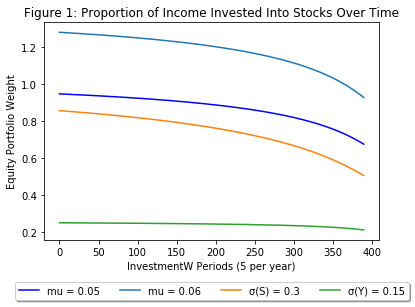

In [32]:
# Simple plotting

plt.plot(time, reg, label = 'mu = 0.05', color = 'blue')
plt.plot(time, fs_mu2, label = 'mu = 0.06')
plt.plot(time, calc_fstar(vS = 0.3), label = 'σ(S) = 0.3')
plt.plot(time, calc_fstar(vY = 0.2), label = 'σ(Y) = 0.15')
plt.title("Figure 1: Proportion of Income Invested Into Stocks Over Time")
plt.xlabel("InvestmentW Periods (5 per year)")
plt.ylabel("Equity Portfolio Weight")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.17),
          fancybox=True, shadow=True, ncol=5)

Figure 1 shows that the optimal allocation of capital will see a decrease in the proportion of wealth invested in stocks (as opposed to the risk-free asset) as time progresses towards retirement. This is due to the fact that the potential benefits of time diversification fall as Tom gets closer to retirement. When the volatility of the fundamental value of the stock approaches the volatility of the stock, the potential for time diversification dissipates.

Moreover, the differing investment paths of different model parameters show how optimal portfolio allocation is affected by changes in the parameters. Namely, what we gather from this figure is that the optimal allocation of retirement funds change substantially with the expected return of the stock, as well as its long-run volatility, which also holds for the standard Black-Scholes model. Compared to these parameters, the optimal proportion in stocks is not very sensitive to the short-run fluctuations in the market value of equity.

## Monte Carlo Simulation

### The Main Function

The following function is the most important part of our code. Using a set of baseline parameters, it first analytically calculates the optimal ratio of investment in equity, as opposed to risk-free bonds. Afterwards, it runs a Monte Carlo simulation with *scenarios* number of repetitions, which gives us an idea of how the supposedly optimal investment strategy performs with simulated normally distributed stock returns. 

In [33]:
def main(T = 59, density = 5, scenarios = 100, JerryIsRight = False, overRideJerry = True, overRideJerryValue = 1,
        volatilityS = 0.2, volatilityY = 0.1, retirementDuration = 20, riskAversion = 3, a = 0.4, graph = False):
    
    # steps and delta determine how close the model approximates continuous time
    steps = T * density
    deltaT = T / steps
    
    # declaring lists and arrays to be used in further calculation
    variance = [0]*20 # the variance of the value of the stock in the future
    logVol = [0]*20 # scaled variance of the natural logarithm of the value of the stock in the future
    decrual = np.empty([retirementDuration * density - 1, scenarios]) # amounts withdrawn during retirement by Tom
    JerryDecrual = np.empty([retirementDuration * density - 1, scenarios]) # amounts withdrawn during retirement by Jerry
    stocks = [0] * steps # stock values
    economies = [0] * steps # stock fundamental values
    F = [0] * steps # portfolio values of Tom
    FJerry = [0] * steps # porfolio values of Jerry
    fStar = [0] * steps # optimal portfolio allocation for Tom as prescribed by the model 
    transfer = 0
    
    # declaring the second dimensions of previously declared lists
    for i in range(steps):
        FJerry[i] = [0] * scenarios
        F[i] = [0] * scenarios
        fStar[i] = [0] * scenarios
        stocks[i] = [0] * scenarios
        economies[i] = [0] * scenarios
        
    # the optimal portfolio allocation given that Jerry does not believe in stock reversion
    JerryStar = (mu - r) / (volatilityS ** 2 * riskAversion)

    # optional parameter by which one can manually adjust Jerry's portfolio allocation
    if overRideJerry:
        JerryStar = overRideJerryValue
    
    # constant value used in the determination of optimal fund allocation for Tom
    dominantTerm = 2*S0**2*(a+mu)/(2*a+2*mu+volatilityY**2-volatilityS**2)
    
    # iteration through the Monte Carlo repetitions
    for j in range(1, scenarios + 1):
        # initializing model parameters
        B = B0 # bond value at t = 0
        Y = Y0 # underlying stock value at t = 0
        S = S0 # market value of stock at t = 0

        # initializing iteration values 
        SPosition = 0 # amount of stock held by Tom
        BPosition = 0 # amount bonds held by Tom
        JerrySPosition = 0 # amount of stock held by Jerry
        JerryBPosition = 0 # amount of bonds held by Jerry
        
        # iterating through time steps (number of years * sub-periods per year)
        for i in range(1, steps):
            fStar[i - 1][j - 1] = 0 # initializing period-specific F* value
            
            # holds true during working years (i.e. graduation to retirement)
            if i <= (T - retirementDuration) * steps / T:
                for l in range(1, retirementDuration + 1): # we create a portfolio for each retirement period
                    duration = T - retirementDuration + l - i / steps * T # time until specific retirement period
                    
                    # calculation of the variance of stock at maturity
                    exponentDominant = math.exp(duration*(2*mu+volatilityY**2)) 
                    correctionTerm = S0**2 - dominantTerm
                    exponent = math.exp(((duration/(a+mu+volatilityY**2))*(-2*a**2-a*volatilityS**2+mu*volatilityY**2-2*a*mu + a*volatilityS**2 + volatilityY**2*volatilityS**2 + mu * volatilityS ** 2)))
                    variance[l - 1] = dominantTerm*exponentDominant + correctionTerm*exponent - S0**2*math.exp(2*mu*duration)
                    logVol[l - 1] = (1 / duration * math.log(1 + variance[l - 1]/(S0 ** 2 * math.exp(2 * mu * duration)))) ** 0.5 # calculating variance of the log and scaling to one time unit
                    
                    
                    optimalAllocationToStocks = (mu - r)/(riskAversion*logVol[l - 1]**2)  # optimal portfolio weight for stocks, given maturity                    
                    maturityWeight = (math.exp(mu)-1)*math.exp(mu*l)/(math.exp(mu)**20-1)  # how much of the investment is dedicated to a particular maturity                    
                    fStar[i - 1][j - 1] += optimalAllocationToStocks * maturityWeight  # weighted sum of the maturities, times optimal allocation
                
                # calculating the new amounts held in stocks and bonds
                SPosition += deltaT * wage * fStar[i - 1][j - 1] / S
                BPosition += deltaT * wage * (1 - fStar[i - 1][j - 1]) / B
                JerrySPosition = JerrySPosition + deltaT*wage*JerryStar/S
                JerryBPosition = JerryBPosition + deltaT*wage*(1-JerryStar)/B
            else:  # runs during retirement periods
                # termination of the function if either agent's portfolio is of prohibitively small value
                if not graph:
                    if F[i - 1][j - 1] < 0.00001: 
                        sys.exit("Due to unfortunate random simulation, Tom's savings ran out before retirement, or he was bankrupt at the beginning, resulting in prohibitively negative welfare" + "\n\nPlease Run Again")
                    if FJerry[i - 1][j - 1] < 0.00001:  
                        sys.exit("Due to unfortunate random simulation, Jerry's savings ran out before retirement, or he was bankrupt at the beginning, resulting in prohibitively negative welfare" + "\n\nPlease Run Again")
                
                cumulativeFStar = SPosition*S/F[i - 1][j - 1]  # realized proportion of stock value in portfolio
                excessReturn = min(mu*cumulativeFStar +r*(1-cumulativeFStar), 0.1)  # expeced return on the entire portfolio, capped at 0.1 
                periodWeight = math.exp(excessReturn*(steps - i - 1)*deltaT)*(math.exp(deltaT*excessReturn)-1)/(math.exp(excessReturn*(steps-i)*deltaT)-1)  # how much Tom withdraws given expected portfolio trajectory
                
                # withdrawal of Tom, and resulting positions in stocks and bonds
                decrual[i - int((T-retirementDuration)*steps/T) - 1][j - 1] = F[i - 1][j - 1] * periodWeight
                SPosition = SPosition * (1 - periodWeight)
                BPosition = BPosition * (1 - periodWeight)
                
                # the same as above, but for Jerry
                excessReturnJerry = mu * JerryStar + r * (1 - JerryStar)
                periodWeightJerry = math.exp(excessReturnJerry*(steps-i - 1)*deltaT)*(math.exp(deltaT*excessReturnJerry)-1)/(math.exp(excessReturnJerry*(steps-i)*deltaT)-1)
                JerryDecrual[i - 1 - int((T - retirementDuration) * steps / T)][j - 1] = FJerry[i - 1][j - 1] * periodWeightJerry
                JerrySPosition = JerrySPosition * (1 - periodWeightJerry)
                JerryBPosition = JerryBPosition * (1 - periodWeightJerry)
            
            # monte carlo simulation part for each period
            w = [deltaT ** 0.5 * np.random.normal(0, 1), deltaT ** 0.5 * np.random.normal(0, 1)] # random variation in the stock and its underlying value, respectively
            # trajectory of bond values
            dB = r * B * deltaT 
            B = B + dB
            
            # first block runs when Jerry's assumption is wrong, i.e. when there is reversion of the market value of the stock to its true underlying value, second block runs otherwise
            # calculates the stock value and the underlying trajectories
            if not JerryIsRight:
                dY = mu * Y * deltaT + volatilityY * Y * w[0]
                dS = a*(Y-S)*deltaT + volatilityS*S*w[1]
                Y = Y + dY
                S = S + dS

                F[i][j - 1] = SPosition*S + BPosition*B 
                FJerry[i][j - 1] = JerrySPosition * S + JerryBPosition * B
                stocks[i - 1][j - 1] = S
                economies[i - 1][j - 1] = Y
            else:
                dS = mu * S * deltaT + volatilityS * S * w[1]
                S = S + dS

                F[i][j - 1] = SPosition * S + BPosition * B
                FJerry[i][j - 1] = JerrySPosition * S + JerryBPosition * B
                stocks[i - 1][j - 1] = S
                economies[i - 1][j - 1] = None # since stocks do not revert in this scenario, there is no underlying value
    
    # calculating mean welfare of both agents, across all time periods and simulation iterations
    Welfare = np.mean(-decrual ** (1 - riskAversion))
    WelfareJerry = np.mean(-(JerryDecrual) ** (1 - riskAversion))  
    
    # calculating Jerry's certainty equivalent which would bring his utility to that of Tom's
    if not graph:
        precision = 20
        for j in range (-200 * wage, 200 * wage + 1):
            i = j / 100
            dif = np.mean(-(JerryDecrual + i) ** (1-riskAversion)) - np.mean(-decrual ** (1-riskAversion))
            if  abs(dif) < precision:
                equityTransfer = i
                precision = abs(dif)
        transfer = 100*equityTransfer/np.mean(JerryDecrual)  # scaling the transfer to Jerry's retirement income
    
    # returning a dictionary of all relevant obtained data
    output = {
        "F": np.array(F),
        "FJ": np.array(FJerry),
        "welfare": [Welfare, WelfareJerry],
        "transfer": transfer,
        "stocks": np.array(stocks),
        "econ": np.array(economies)
    }

    return(output)


### Portfolio Trajectory

In this section, we explore the trajectories of cumulative portfolio values based on the Monte Carlo Simulations. 

In order to show the paths taken by differently performing portfolios, we first run the simulation to obtain data on the realized portfolio values, using different parameters for comparison. What we get in data is a matrix with one column for each simulation, and one row for each time period in an agent's lifetime. Next, we write a function which takes this data and for each point in time calculates the q-th percentile of cross-sectional cumulative portfolio returns. 

In case the reader wishes to run this code, the topmost line of the following chunk is important to limit the processing time of the simulations. However, we do urge the reader to avoid too few iterations, as it will improve the accuracy of the results.

In [34]:
# simulations for different model specifications
repetitions = 10

ff1 = main(scenarios = repetitions, graph = True)  # benchmark parameters
ff2 = main(scenarios = repetitions, overRideJerry = True, overRideJerryValue = 0, graph = True)  # Jerry invests 0% into stocks
ff3 = main(scenarios = repetitions, overRideJerry = True, overRideJerryValue = 3, graph = True)  # Jerry invests 300% portfolio into stocks

In [35]:
# takes a two-dimensional array and percentile as arguments, returns a list of q-th quantile values across scenarios
def quantileplot(data, q):
    step = data.shape[0]  # length of the data is the number of time periods
    scenario = data.shape[1]  # width of the data is the number of scenarios (simulations)
    
    output = [0] * step  # declares output list
    
    # for each step, takes the cross-sectional q-th percentile portfolio value and stores it in the output list
    for i in range(step): 
        output[i] = np.quantile(data[i, :], q)
    
    return(output)

In discussing why it is the case that economic agents are not exposed entirely to the stock, but also choose to hold bonds which provide a lower average return, we need to think about what it is that the agents attempt to maximize in the first place. The standardly assumed CRRA (constant relative risk aversion), such as exhibiteed by log-utility, makes it such that a combination of two mild outcomes is preferred to a combination of a very good outcome and a very poor one. Therefore, along with the pursuit of high returns, there is a pursuit of a safety "cushion", below which investors do not want to find themselves.

To visualize this, we plot the 95th and 5th percentile outcomes (Figures 2 & 3, respectively) of portfolio trajectory for three different investment strategies: in blue we have the benchmark scenario where Jerry follows the model's optimal investment strategy, in green we have a 100% bond portfolio, and in orange we have 300% exposure to stock. Notice that the reversal point of the portfolio is around the point of retirement, when the agent stops investing and starts withdrawing from their retirement fund. For more detail on the benchmark portfolio allocation, see Figure 1.



Text(0.5, 1.0, 'Figure 2: 95th Percentile of Portfolio Value for Three Investment Strategies')

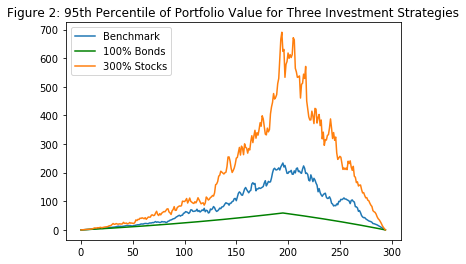

In [36]:
plt.plot(quantileplot(ff1["FJ"], 0.95), label = "Benchmark")
plt.plot(quantileplot(ff2["FJ"], 0.95), label = "100% Bonds", color = "green")
plt.plot(quantileplot(ff3["FJ"], 0.95), label = "300% Stocks")
plt.legend()
plt.title("Figure 2: 95th Percentile of Portfolio Value for Three Investment Strategies")

Text(0.5, 1.0, 'Figure 3: 5th Percentile of Portfolio Value for Three Investment Strategies')

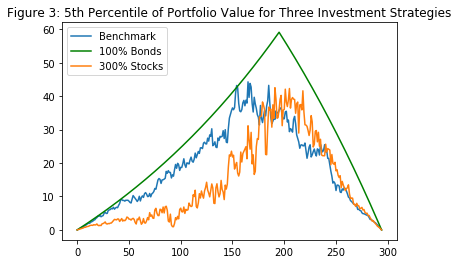

In [55]:
plt.plot(quantileplot(ff1["FJ"], 0.05), label = "Benchmark")
plt.plot(quantileplot(ff2["FJ"], 0.05), label = "100% Bonds", color = "green")
plt.plot(quantileplot(ff3["FJ"], 0.05), label = "300% Stocks")
plt.legend()
plt.title("Figure 3: 5th Percentile of Portfolio Value for Three Investment Strategies")

Figure 4 graphs the threshold of 5% best scenarios of each investment strategy. As expected, overexposure to equity (achieved by shorting the risk-free bond) significantly outperforms the other two strategies. Although the upside potential of this strategy is attractive, the poor performance of this portfolio in case of bad luck is enough to outweigh the potential benefits. This brings us to Figure 5, which graphs the same but at the 5% point of worst performing portfolios. As expected, the bond portfolio, which is the safest, performs best in times of low equity returns. Contrasting this is the equity overexposure portfolio, which underperforms. Lastly, there is the optimal allocation portfolio which does underperform as well, but it tends to more closely follow the path of the bond portfolio. 

To put numbers to the above figures, in the following table we report the mean welfare of the agent across all scenarios and points in time for each strategy. Although the only-stock portfolio had the highest upside, it also exhibited by far the lowest mean welfare. This is because the risk aversion exhibited by agents makes them dislike very poor outcomes more than they value very good outcomes.

Table 1: Mean Welfare Across All Scenarios, by Strategy

|Benchmark|100% Bonds|300% Stocks|
|----|---|----|
|-0.7273|-1.9198|-10632587.50|

In [38]:
print(ff1["welfare"][1])
print(ff2["welfare"][1])
print(ff3["welfare"][1])

-2.4496271313665208
-1.9198899305984736
-0.2155081929357932


In [39]:
a = main(JerryIsRight = True, overRideJerry = False)["transfer"]
b = main(overRideJerry = False)["transfer"]
c = main(overRideJerryValue = sum(reg) / len(reg))

In [40]:
print(a)
print(b)
print(c["transfer"])

-29.370592202219406
19.270442879349197
0.5656502212024813


These results show that Tom wins when there is scope for time diversification (by around 27%). Largely, this is part because he simply invests more, which is the size effect. Some positive benefit also derives from his dynamic strategy (0.5%). Nevertheless, When Tom is wrong and there is no time diversification. Tom loses more than if he correctly assumes time diversification (28%)

# Sensitivity Analysis

With the following code, we run Monte Carlo simulations of the model with different combinations of parameters to determine the welfare of the representative agent, conditional on changes in certain parameter values. The heavy lifting is done by the *main()* function, which simulates stock returns at each step (sub-period), runs the necessary computation, and returns numpy arrays of the appropriate data, which we then parse for graphing. Unfortunately, since we have to simulate the entire model separately across enough combinations of parameter values to create a graph, we do not have the luxury of a particularly high number of simulations. 

Once again, we warn the reader to potentially change the first line of the following chunk if they wish to compile the code more quickly.

In [46]:
repetitions = 10 # number of repetitions of the monte carlo simulation (high number of repetitions result in unfortunately long processing times)

dp = 11 #  number of horizonal data points (e.g. volatility from 0.5 to 0.15 in increments of 0.01)
inc = 0.01 # aforementioned increments of the x-axis data

# the below code declares the lists which we will populate with the monte carlo simulation data
welfare_by_vY = [0] * dp
welfareJ_by_vY = [0] * dp
welfare2_by_vY = [0] * dp
welfareJ2_by_vY = [0] * dp

# initializes the list of desired values of the volatilityY parameter
vY = [(0.05 + i * inc) for i in range(dp)]

Figure 4 shows the welfare of Tom and Jerry when the volatility of the underlying value of the stock is changed. For very low volatilities, both Jerry and Tom benefit as the utility function is concave and the results of the stochastic stock prices are closer to the mean. For higher volatilities, conversely, welfare is lower for both as the volatility in the stock prices increase. As may be seen from the figure, the welfare of Tom is higher than the welfare for Jerry for all values of $\sigma_Y$. This shows that taking account of stock reversion when it exists may yield substantial welfare gains for a wide range of volatilities of the underlying value. As expected, when the volatility of the underlying value approaches that of the stock, the welfares of both Tom and Jerry equalize, as room for time diversification disappears.


In [48]:
for i in range(dp):
    wf = main(scenarios = repetitions, density = 5, volatilityY = vY[i], JerryIsRight = False, overRideJerry = False)
    welfare2_by_vY[i] = wf["welfare"][0]
    welfareJ2_by_vY[i] = wf["welfare"][1]

Text(0, 0.5, 'Welfare')

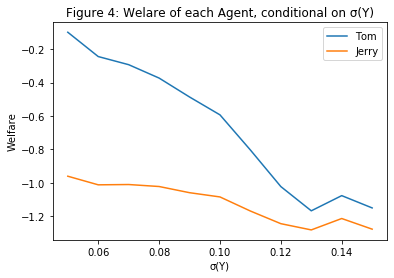

In [49]:
plt.plot(vY, welfare2_by_vY, label = 'Tom')
plt.plot(vY, welfareJ2_by_vY, label = 'Jerry')
plt.title("Figure 4: Welare of each Agent, conditional on σ(Y)")
plt.legend()
plt.xlabel("σ(Y)")
plt.ylabel("Welfare")


One may, however, speak of a dynamic-effect and size-effect of time-diversification. Tom wins not only because he invests more (the size-effect), but also because he has a dynamic strategy of investing more in earlier periods (the dynamic-effect). By manually adjusting the parameters, it was found that given the benchmark parameters, investing 100% of the portfolio into stocks was approximately the optimal fixed strategy. Using this portfolio for Jerry instead, figure 2) was plotted. This figure shows that Tom’s strategy is still as good as Jerry’s strategy, and for slight deviations from $\sigma_Y=0.1$ it is found that Tom’s strategy is superior.

In [56]:
# loops through the desired parameter values, and passes them to the main function to run the MC simulation on each loop iteration, which returns the data required for the graphs
for i in range(dp):
    wf = main(scenarios = repetitions, density = 5, volatilityY = vY[i], JerryIsRight = False, overRideJerry = True)  # calls the main function with a set of parameters
    welfare_by_vY[i] = wf["welfare"][0]  # stores Tom's welfare
    welfareJ_by_vY[i] = wf["welfare"][1]  # stores Jerry's welfare

Text(0, 0.5, 'Mean Welfare')

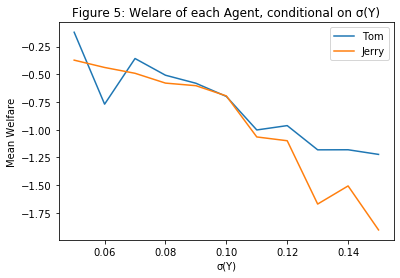

In [57]:
plt.plot(vY, welfare_by_vY, label = 'Tom')
plt.plot(vY, welfareJ_by_vY, label = 'Jerry')
plt.title("Figure 5: Welare of each Agent, conditional on σ(Y)")
plt.legend()
plt.xlabel("σ(Y)")
plt.ylabel("Mean Welfare")

# Conclusion

When stocks revert to some underlying value, that is less volatile than the volatility in the stock price itself, there is room for time diversification. When it is assumed that agents use a “buy and hold strategy”, the optimal proportion in stocks becomes dependent on the duration of the portfolio. In particular, the formula derived for the variance states that the log-returns decrease in volatility over time, which implies that the sharp ratio increases for durations. 

Considering stock reversion and adjusting the portfolio optimally may result in a welfare improvement for two reasons. First, the trader may invest more into stocks. Second, the trader uses a dynamic strategy: investing more into stocks for longer maturities and less for shorter maturities. Given our benchmark parameters, we find that by far the largest welfare gain is simply due to investing more into stocks.

If someone however mistakenly beliefs that stocks revert, while they do not, large welfare losses may ensue. Under reasonable specifications, Tom invested so much into stocks that he went bankrupt in some of the more negative scenarios. This in turn may explain why the literature usually assumes no mean-reversion of stocks, namely because assuming no mean-reversion of stocks is the “better-safe-than-sorry” position.

For any future research, several points could be improved upon. First, the approximation formula used to calculate the variance of the stock at a time T could be improved. In truth, the formula never needed to be an approximation formula, but it was rather difficult to derive the correct expression for the variance. Moreover, the approximation formula for the variance was based upon the belief that the value of the stock was equal to the underlying value. One could possibly come up with a better estimate of the underlying value of the stock.
Second, the program could use some more computing power to lower the variance of the different estimates. Besides more computing power, several techniques are known to decrease the standard deviation of the mean random variables such as the antithetic variates technique.  The underlying value of the stock could for instance control for the market price of the stock. 

Third, this paper was ‘forced’ into considering a buy and hold strategy to exploit time diversification. The effect of potential for time-diversification on other strategies may however be considered as well. For instance, what would an optimal fixed-mix strategy look like in the face of time-diversification. Is a fixed-mix strategy better than a buy-and-hold strategy in case of time-diversification? 
